<a href="https://colab.research.google.com/github/UITTrinhQuangTruong/CS114.K21/blob/master/%C4%90%E1%BB%93_%C3%A1n_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Đổi tên hàng loạt

In [ ]:
#254 Cobaoluc
#272 Khongbaoluc
!/bin/sh '/content/drive/My Drive/Machine Lol/Data/rename.sh'

^C


In [7]:
def CvCanny(matrix):
  v = np.median(matrix)
  sigma = 0.33
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  canny = cv2.Canny(matrix, lower, upper, True)
  return canny

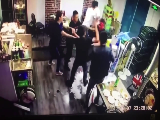

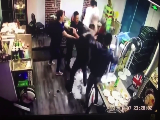

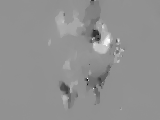

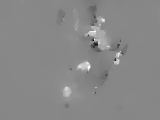

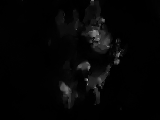

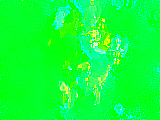

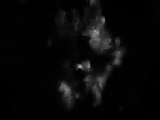

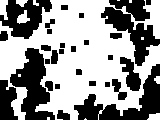

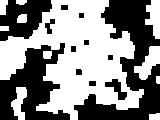

3


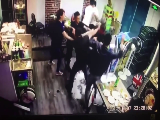

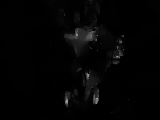

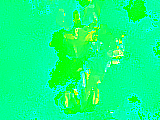

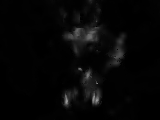

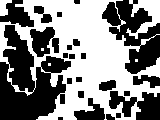

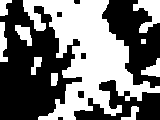

6


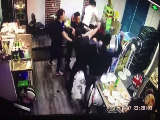

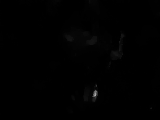

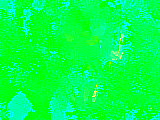

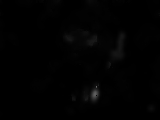

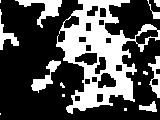

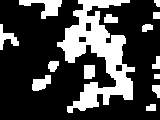

9


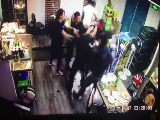

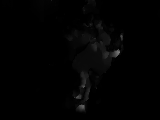

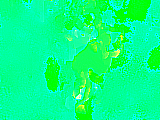

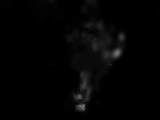

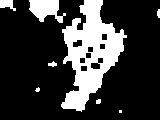

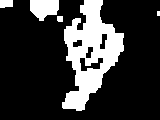

12


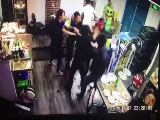

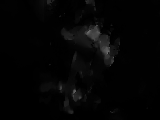

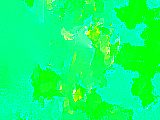

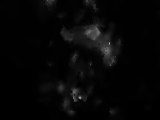

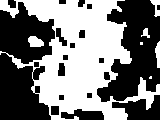

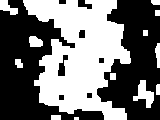

15


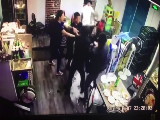

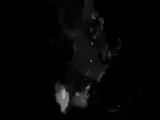

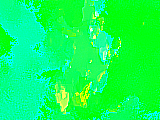

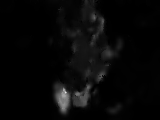

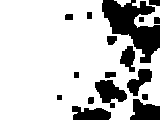

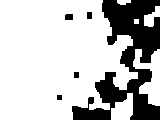

18


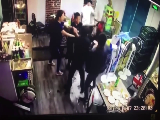

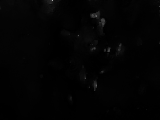

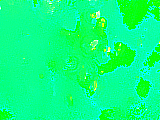

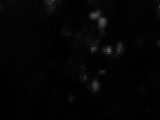

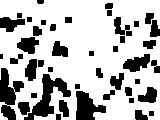

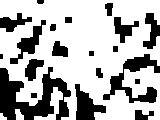

21


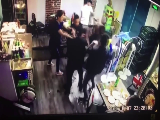

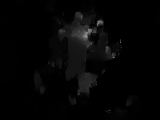

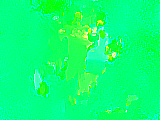

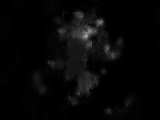

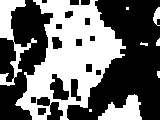

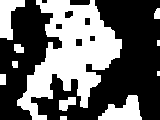

24


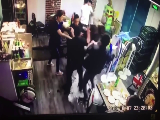

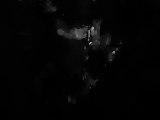

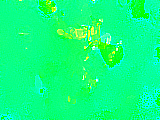

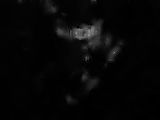

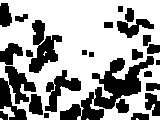

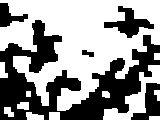

27


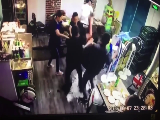

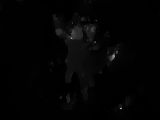

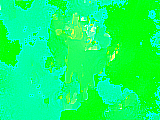

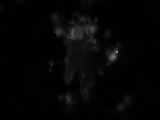

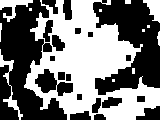

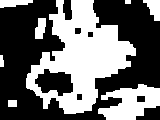

30


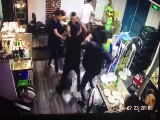

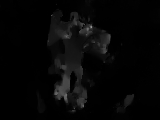

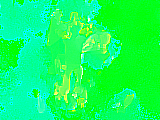

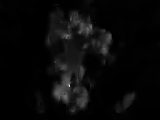

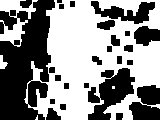

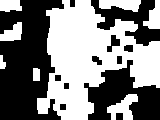

33


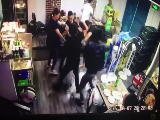

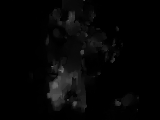

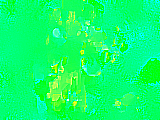

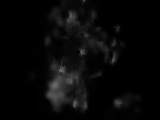

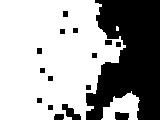

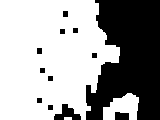

36


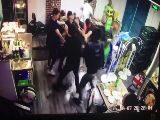

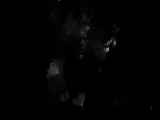

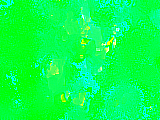

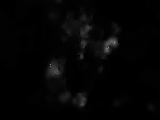

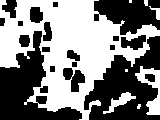

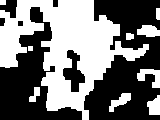

39


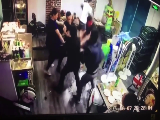

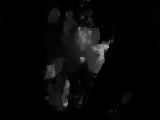

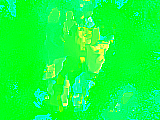

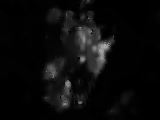

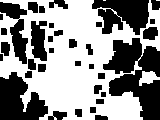

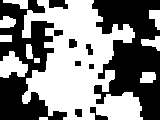

42


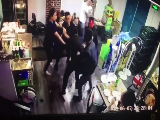

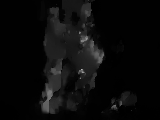

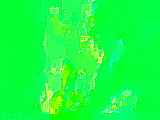

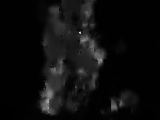

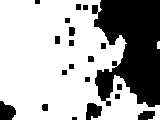

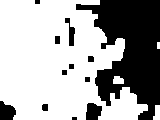

45


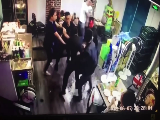

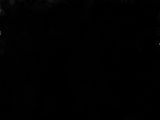

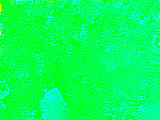

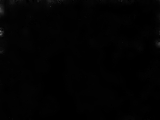

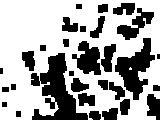

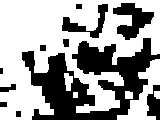

48


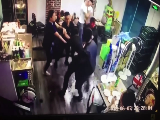

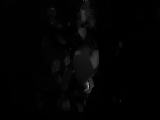

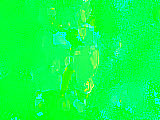

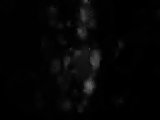

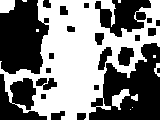

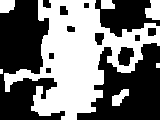

51


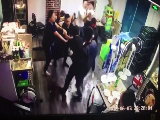

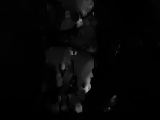

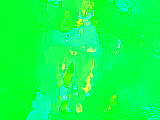

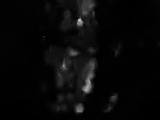

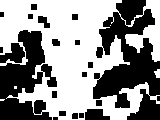

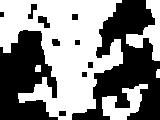

54


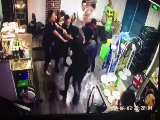

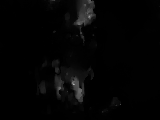

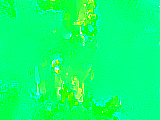

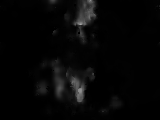

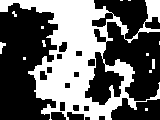

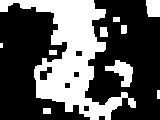

57


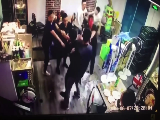

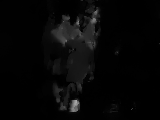

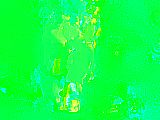

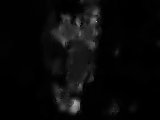

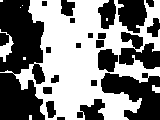

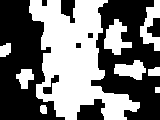

60


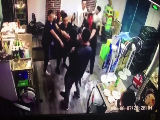

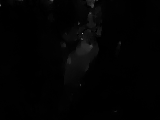

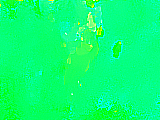

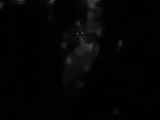

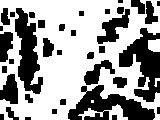

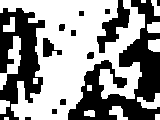

63


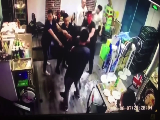

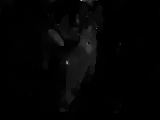

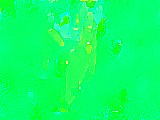

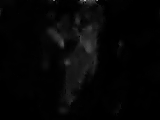

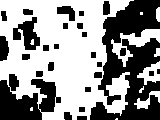

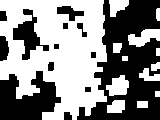

66


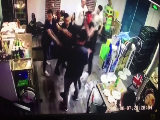

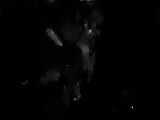

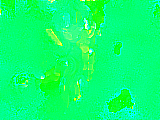

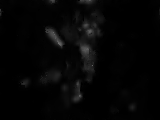

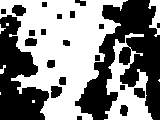

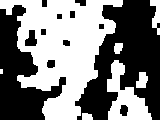

69


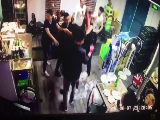

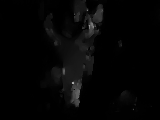

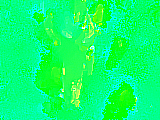

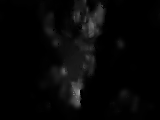

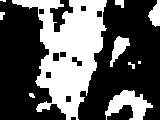

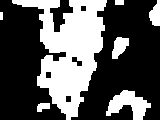

72


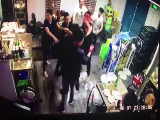

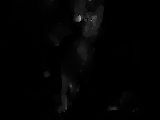

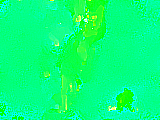

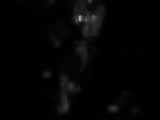

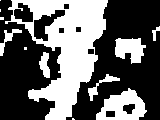

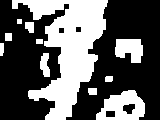

75


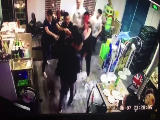

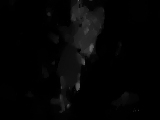

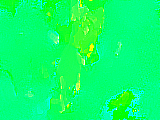

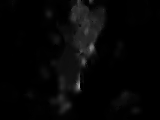

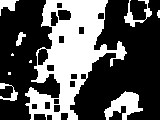

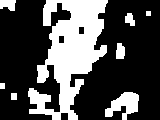

78


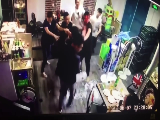

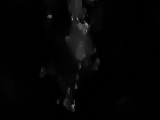

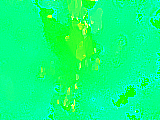

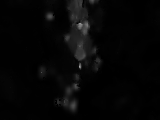

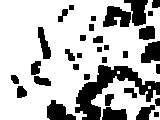

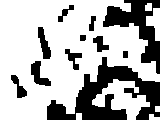

81


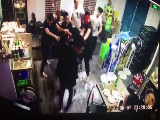

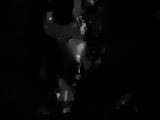

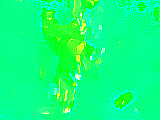

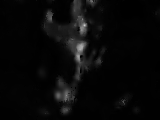

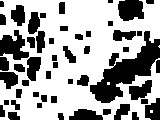

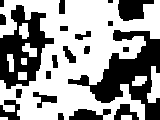

84


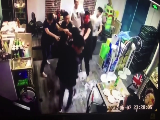

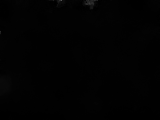

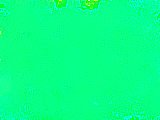

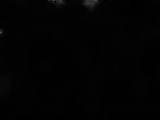

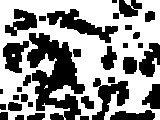

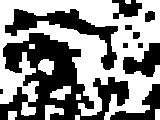

87


In [13]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
 
 
cap = cv2.VideoCapture("/content/drive/My Drive/Machine Lol/Data/cobaoluc/30.mp4")
ret, frame1 = cap.read()
frame1 = cv2.resize(frame1, (160, 120))
cv2_imshow(frame1)
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
s = 1
while(cap.isOpened()):
    ret, frame2 = cap.read()

    if not ret:
      break;
    if s % 3 == 0:
      frame2 = cv2.resize(frame2, (160, 120))
      cv2_imshow(frame2)
      #Trích xuất dòng quang từ 2 frame gần nhau
      next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
      optical_flow = cv2.optflow.DualTVL1OpticalFlow_create()
      flow = optical_flow.calc(prvs, next, None)
      if s == 3:
        flowx = cv2.normalize(flow[...,0],None,0,255,cv2.NORM_MINMAX)
        cv2_imshow(flowx)
        flowy = cv2.normalize(flow[...,1],None,0,255,cv2.NORM_MINMAX)
        cv2_imshow(flowy)
      mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
      hsv[...,0] = ang*180/np.pi/2
      nom = np.zeros((160,120))
      hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
      bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
      gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

      #Tăng độ nét cho ảnh dòng quang
      kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
      sharpen = cv2.filter2D(hsv, -1, kernel)
      canny1 = CvCanny(sharpen)
      canny2 = CvCanny(gray)
      
      #gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
      cv2_imshow(gray)
      cv2_imshow(sharpen)
      
      gray1 = cv2.filter2D(gray, -1, kernel)[...,::-1]
      gray = cv2.ximgproc.guidedFilter(gray, gray1, radius=2, eps=0.004, dDepth=-1)[...,::-1]
      canny3 = CvCanny(gray)
      cv2_imshow(gray)
      

      kernel = np.ones((5,5),np.uint8)
      closing = cv2.morphologyEx(canny2, cv2.MORPH_CLOSE, kernel)
      closing_inv = cv2.bitwise_not(closing)
      
      h, w = closing.shape[:2]
      mask = np.zeros((h+2, w+2), np.uint8)
      im_floodfill = closing.copy()
      cv2.floodFill(im_floodfill, mask, (0,0), 255);
      im_floodfill_inv = cv2.bitwise_not(im_floodfill)
      floodfill = closing | im_floodfill

      opening = cv2.morphologyEx(floodfill, cv2.MORPH_OPEN, kernel)
      '''cv2_imshow(canny1)
      cv2_imshow(canny2)
      cv2_imshow(canny3)'''
      cv2_imshow(opening)
      print(s)
      prvs = next.copy()
    s += 1

###Tìm HOG, HOG 